# Cover Sheet

* **Subject Title:** Biometrics
* **Assignment Title:** Implementing a Biometric Technique


## Declaration
- I have read the UHE’s Student Academic Integrity Policy and Procedures.
- I understand the consequences of engaging in plagiarism and collusion as described in UHE’s Academic integrity Policy 
- I have taken proper care to safeguard this work and made all reasonable efforts to ensure it could not be copied.
- No part of this assignment has been previously submitted as part of another unit/course.  
    - I acknowledge and agree that the assessor of this assignment may for the purposes of assessment, reproduce the assignment and:  
    - provide to another member of faculty and any external marker; and/or  
    - submit it to a text matching software; and/or  
    - submit it to a text matching software which may then retain a copy of the assignment on its database for the purpose of future plagiarism checking.
- I certify that I have not plagiarised the work of others or participated in unauthorised collaboration when preparing this assignment.

**Student's Name:** Harold Murillo

**Date:** 17 / September / 2024

**In this assessment we are going to implement a neural network with Convolution architecture to predict the user base on the given data.**



In [1]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#Load the postures_cleaned csv fle into pada data frame

df = pd.read_csv('Postures_cleaned.csv')

In [4]:
df

,Unnamed: 0,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
0,2,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781
1,3,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418
2,4,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316
3,5,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146
4,6,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74970,78092,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186,-1.901940,98.056881,4.075018,26.030878,136.368236,-32.792393
74971,78093,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723,-22.743924,104.726272,-53.007244,26.446943,135.823494,-33.851425
74972,78094,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140,-30.225675,77.688911,-17.354844,26.506640,135.605903,-34.441463
74973,78095,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853,26.715915,135.523929,-34.675774,-22.329495,104.026431,-54.334623


In [5]:
# Set the user colum as the target variable 
y = df['User'] # target

#Extract the raimaining colums as features
X = df.drop (['User', 'Class'], axis=1) #features

In [6]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
# Split the data into training 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42) 

In [8]:
#Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform (X_test)



In [9]:
# Reshape data for CNN input (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Get the number of unique classes
num_classes = len(np.unique(y_encoded))

In [11]:
#Create the CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Compile the model 
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
#train the model 
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3158 - loss: 1.9724 - val_accuracy: 0.7146 - val_loss: 0.8376
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6649 - loss: 0.9244 - val_accuracy: 0.8340 - val_loss: 0.5311
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7584 - loss: 0.6836 - val_accuracy: 0.8866 - val_loss: 0.3823
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7990 - loss: 0.5741 - val_accuracy: 0.9138 - val_loss: 0.3022
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8252 - loss: 0.5067 - val_accuracy: 0.9284 - val_loss: 0.2554
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8451 - loss: 0.4514 - val_accuracy: 0.9096 - val_loss: 0.2855
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8559 - loss: 0.4205 - val_accuracy: 0.9230 - val_loss: 0.2589
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8609 - loss: 0.4008 - 

In [14]:
#Evaluate the model 
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
misclassification_rate = 1 - test_accuracy

print(f"Test accuracy: {test_accuracy:.4f}")
print (f"Missclassification rate: {misclassification_rate:.4f}")


Test accuracy: 0.9790
Missclassification rate: 0.0210


In [15]:

#Make predictions
predictions = model.predict(X_test_reshaped)
predicted_classes = np.argmax(predictions, axis=1)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step



Confusion Matrix:
[[1639   12    0    1    0    0    0    5    0    0    0    0    0    0]
 [  13  842   36    0    6    0    0    1    0    0    0    0    0    0]
 [   0    7  891    3   10    0    0    0    0    0    0    0    0    0]
 [   2    3    6   37    0   11    0    8    0    0    0    0    0    0]
 [   0    1    0    0  972    6    0    1    0    0    0    0    0    0]
 [   0    0    3    0    9  849    0   23    0    0    0    0    0    0]
 [   0    0    0    2    2    8   44    9    4    3    0    0    0    0]
 [   0    0    0    0    1    5    0 1376   10    6    0    0    0    0]
 [   0    0    0    0    0    0    0    2  806   18   12    0    0    0]
 [   0    0    0    0    0    0    0    3    0 1856   10    3    0    0]
 [   0    0    0    0    0    0    0    0    0    2 1610   14    1    0]
 [   0    0    0    0    0    0    0    0    0    2    4  933   13    1]
 [   0    0    0    0    0    0    0    0    0    1    0    2 1500    6]
 [   0    0    0    0    0    0 

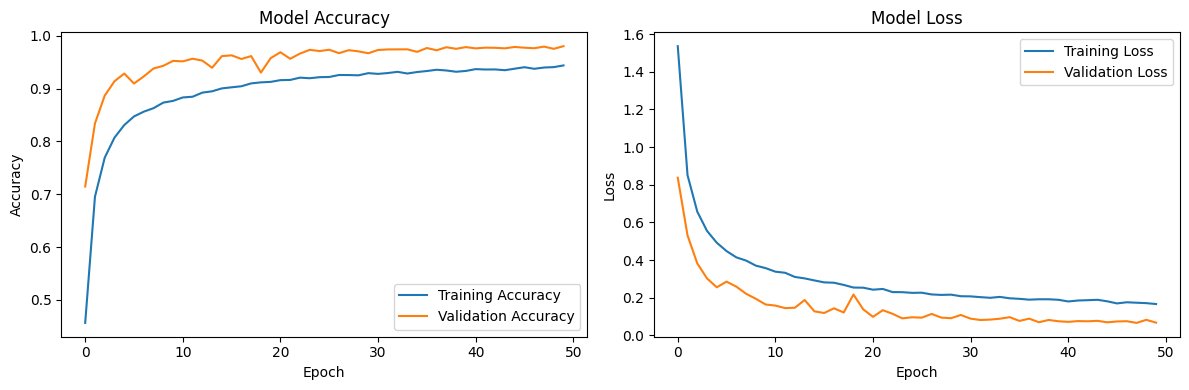

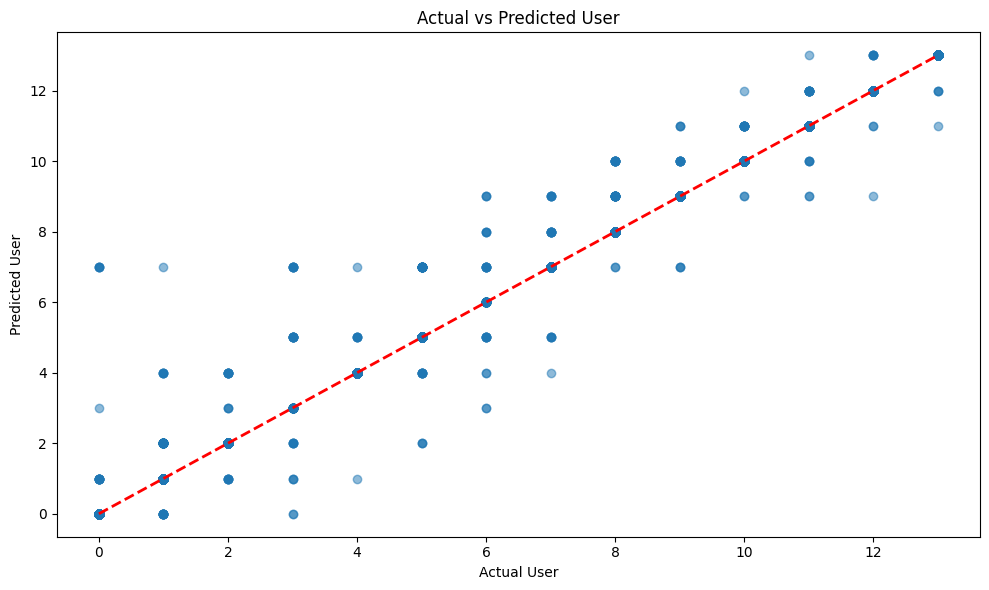

In [16]:
#Confusion matrix and Classification report
conf_matrix = confusion_matrix(y_test, predicted_classes)
class_report = classification_report(y_test, predicted_classes)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_classes, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual User')
plt.ylabel('Predicted User')
plt.title('Actual vs Predicted User')
plt.tight_layout()
plt.show()



Explain how the model works for identification of users?

The model works by taking data as input. In the given dataset, the data is represented by multiple features, for example: “X0”, “Y0”, “Z0”, “X1”, “Y1”, “Z1”, “X2”, “Y2”, “Z2”, “X3”, “Y3”, “Z3”, “X4”, “Y4”, “Z4”. These features are the basis of the model.

The architecture chosen for the neural network was Covolutional Neural Network (CNN). Firstly, there is an input layer that reads the dataset (X_train_reformed), then, there is the covolutional layer like ConviD layer that applies 64 filters, the second Conv1D layer that applies 32 filters and then the Dense layer that connects the layer with 64 neurons that processes the flattened features. Next, the dropuot layer that sets 50% of the inputs to avoid overfitting and then the output layer defined with neurons equal to the number of users, using softmax activation to generate the probability for each user. Finally, the training process started to pass the input data through the neural network to get the prediction.

The user identification

From the trained data, the model is able to identify several new postures and data processing probabilities for each user; users with high probability are predicted based on the posture data.


How accurate is your model?

The model accuracy graph shown above illustrates that the training accuracy starts low at around 50%, however, there is a slight increase in progress and it stabilizes around 90%. This indicates that the model is really learning and is fitting the training data well. Likewise, the validation accuracy started high at 75% and stabilizes around 95%, indicating that the model works well with unseen data.




Would you be willing to deploy your model?

Based on the graphs provided (model accuracy, model loss, and actual vs. predictor), it seems that the model will perform reasonably well. As we can see from the model accuracy, both training and validation are increasing significantly, indicating that the model is actually learning from the data provided and improving its predictive power. Similarly, the training validation loss is decreasing, which is a good indicator of fewer errors. Also, the overall overfitting is positive; however, there is a gap between training and validation accuracy which suggests a potential risk of overfitting.


Discuss one current implementation of hand biometrics in Intrusion Detection Systems. How effective are these techniques?

One of the current applications of hand biometrics in intrusion detection systems is finger vein recognition due to its uniqueness. Each person's finger veins are unique, making this metric highly accurate and becoming the most popular and promising biometric due to its high distinguishing ability, security, and noninvasive procedure.(Zhang & Wang, 2022). 

Another adventage of this biometric measure is  its  Tampers Resistance due to that veins are locates deep in the body which make dificult to copy. 

Efectiveness

Finger vein recognition is a powerful measure with hight percentage of accuracy and realibility in intrusion detection system. This method takes advantage of the distinct physical characteristics of the veins in order to authenticate individuals. Finger vein recognition offers a high level of security, accuracy, and cost-effectiveness compared to other biometric systems (Zhang, 2022)

The quality of the imagen are crucial to accuracy the system. There are some factor that migth affect the quality of the imagen such as ligthing condition and finger placement can influence in the imagen. 

Image quality is crucial for the accuracy of the system. There are a few factors that can affect image quality, such as lighting conditions and finger position.


## References
Zhang, X. (2022). Finger Vein Recognition. https://www.sciencedirect.com/topics/computer-science/finger-vein-recognition#:~:text=This%20method%20takes%20advantage%20of,compared%20to%20other%20biometric%20systems.
Zhang, Z., & Wang, M. (2022, March 14).

 A Simple and Efficient Method for Finger Vein Recognition. NCBI. Retrieved September 17, 2024, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8949429/